In [18]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split,KFold, cross_val_score
from sklearn.metrics import mean_squared_error

In [19]:
linear_df=pd.read_csv("insurance.csv")

In [20]:
linear_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [21]:
linear_df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
age,1338.0,NaN,NaN,NaN,39.207025,14.04996,18.0,27.0,39.0,51.0,64.0
sex,1338,2,male,676,NaN,NaN,NaN,NaN,NaN,NaN,NaN
bmi,1338.0,NaN,NaN,NaN,30.663397,6.098187,15.96,26.29625,30.4,34.69375,53.13
children,1338.0,NaN,NaN,NaN,1.094918,1.205493,0.0,0.0,1.0,2.0,5.0
smoker,1338,2,no,1064,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region,1338,4,southeast,364,NaN,NaN,NaN,NaN,NaN,NaN,NaN
charges,1338.0,NaN,NaN,NaN,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [22]:
print(linear_df.head(5))

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [23]:
linear_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [24]:
linear_df = linear_df.drop(columns=['region'])

In [25]:
linear_df = pd.get_dummies(linear_df, columns=['sex', 'smoker'], drop_first=True)

In [26]:
print(linear_df.head(5))
#sex 1=man smoker 1=yes

   age     bmi  children      charges  sex_male  smoker_yes
0   19  27.900         0  16884.92400         0           1
1   18  33.770         1   1725.55230         1           0
2   28  33.000         3   4449.46200         1           0
3   33  22.705         0  21984.47061         1           0
4   32  28.880         0   3866.85520         1           0


In [27]:
linear_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801
sex_male,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
smoker_yes,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler_st = StandardScaler()
linear_df[['bmi']] = scaler_st.fit_transform(linear_df[['bmi']])
#age ve bmi nin varyansı fazla bu sebeple scaler kullanmak mantıklı geldi
#fakat age için yaş grupları temsili daha mantıklı olabilir scaler yerine 0-4 gibi

In [30]:
linear_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,3.920703e+01,14.049960,18.000000,27.000000,39.000000,51.000000,64.000000
bmi,1338.0,-1.869041e-16,1.000374,-2.412011,-0.716406,-0.043209,0.661157,3.685522
children,1338.0,1.094918e+00,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.0,1.327042e+04,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010
sex_male,1338.0,5.052317e-01,0.500160,0.000000,0.000000,1.000000,1.000000,1.000000
smoker_yes,1338.0,2.047833e-01,0.403694,0.000000,0.000000,0.000000,0.000000,1.000000


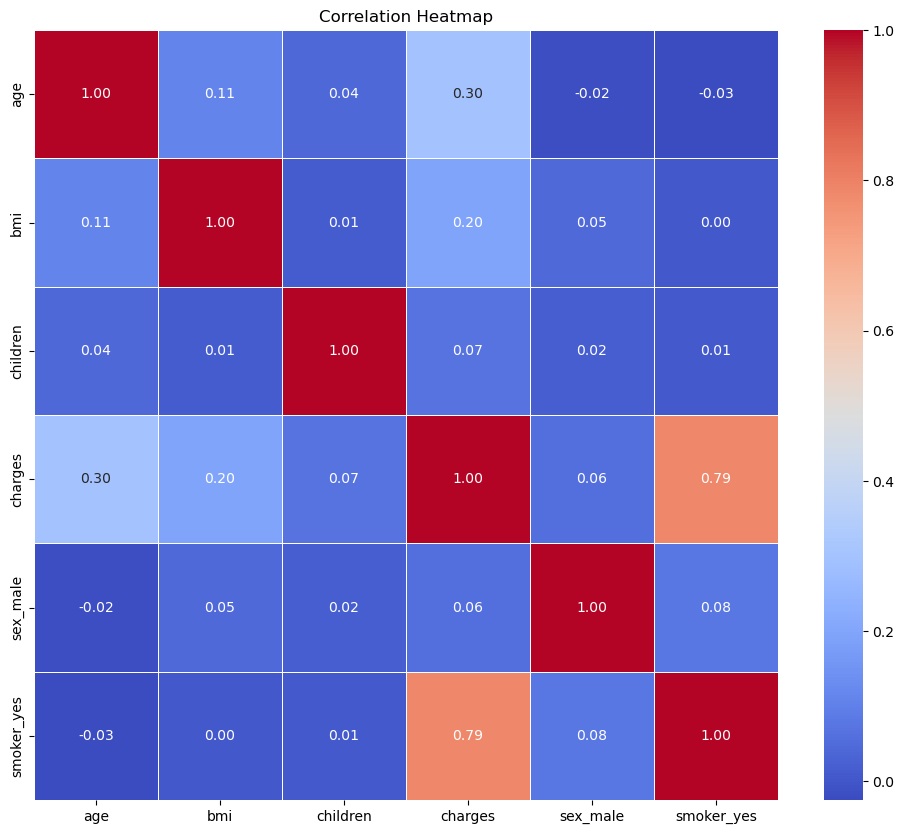

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(linear_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [32]:
def age_group(age):
    if 18 <= age <= 22:
        return 1
    elif 23 <= age <= 27:
        return 2
    elif 28 <= age <= 32:
        return 3
    elif 33 <= age <= 37:
        return 4
    elif 38 <= age <= 42:
        return 5
    elif 43 <= age <= 47:
        return 6
    elif 48 <= age <= 52:
        return 7
    elif 53 <= age <= 57:
        return 8
    elif 58 <= age <= 64:
        return 9
    else:
        return None  # 18-64 dışındaki yaşlar için

# Yaş gruplarını oluşturma
linear_df['age'] = linear_df['age'].apply(age_group)

In [33]:
linear_df.describe(include="all").T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,4.837070e+00,2.733553,1.000000,2.000000,5.000000,7.000000,9.000000
bmi,1338.0,-1.869041e-16,1.000374,-2.412011,-0.716406,-0.043209,0.661157,3.685522
children,1338.0,1.094918e+00,1.205493,0.000000,0.000000,1.000000,2.000000,5.000000
charges,1338.0,1.327042e+04,12110.011237,1121.873900,4740.287150,9382.033000,16639.912515,63770.428010
sex_male,1338.0,5.052317e-01,0.500160,0.000000,0.000000,1.000000,1.000000,1.000000
smoker_yes,1338.0,2.047833e-01,0.403694,0.000000,0.000000,0.000000,0.000000,1.000000


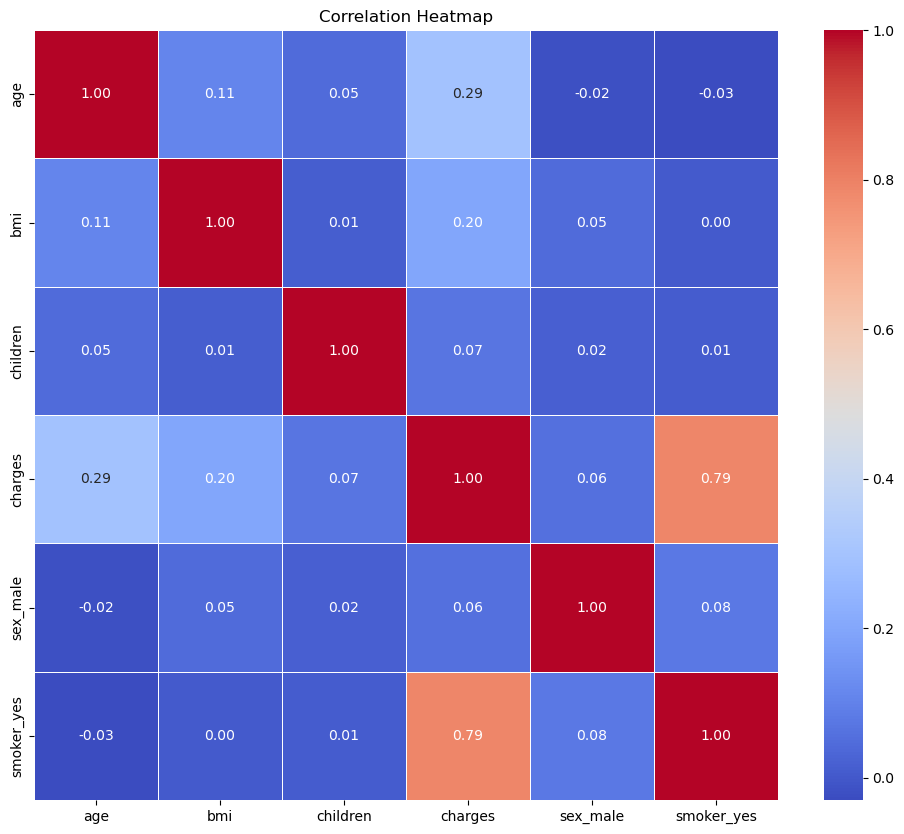

In [34]:
plt.figure(figsize=(12, 10))
sns.heatmap(linear_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [35]:
#yaş gruplamasınını colerasyona etkisi çok olmadı yeterli olabilir

In [36]:
linear_df.head(5)

,age,bmi,children,charges,sex_male,smoker_yes
0,1,-0.453320,0,16884.92400,0,1
1,1,0.509621,1,1725.55230,1,0
2,3,0.383307,3,4449.46200,1,0
3,4,-1.305531,0,21984.47061,1,0
4,3,-0.292556,0,3866.85520,1,0


In [37]:
X = linear_df.drop(columns=['charges'])  # Bağımsız değişkenler
y = linear_df['charges']                  # Hedef değişken

# Veriyi eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
reg= LinearRegression()

In [39]:
reg.fit(X_train,y_train)

LinearRegression()

In [40]:
reg.score(X_test,y_test)

0.7818522841243445

In [41]:
y_pred=reg.predict(X_test)

In [42]:
mean_squared_error(y_test,y_pred,squared=False)

5819.5494814911

In [43]:
kf=KFold(n_splits=6,shuffle=True,random_state=45)

In [44]:
cross_score=cross_val_score(reg,X,y,cv=kf)

In [45]:
print(cross_score)

[0.71379284 0.72592049 0.71786102 0.75985279 0.762985   0.77909609]


In [46]:
np.mean(cross_score)

0.7432513694964326

In [47]:
np.std(cross_score)

0.025042303323365694

In [48]:
# Lasso denemesi
#linear regressionda loss functiona ceza eklemek 

In [49]:
lasso_alpha = [0.01,0.1, 1, 10, 100,1000]

In [50]:
#scores=[]
#for i in lasso_alpha:
#    lasso=Lasso(alpha=i)
#    lasso.fit(X_train,y_train)
#    lasso_pred=lasso.predict(X_test)
#    scores.append(lasso.score(X_test,y_test))

#lasso için uygun alpa 0.1 gibi defoult değer ile aynı buyüzden .coef_ ile featureların önemine bakacağım

In [51]:
lasso=Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
lasso_pred=lasso.predict(X_test)
scores=lasso.score(X_test,y_test)

In [52]:
print(scores)

0.7818518615494179


In [53]:
#hangi değer encok etkiliyor lasso ile kontrol
lasso_coef=lasso.fit(X_train,y_train).coef_

<BarContainer object of 5 artists>

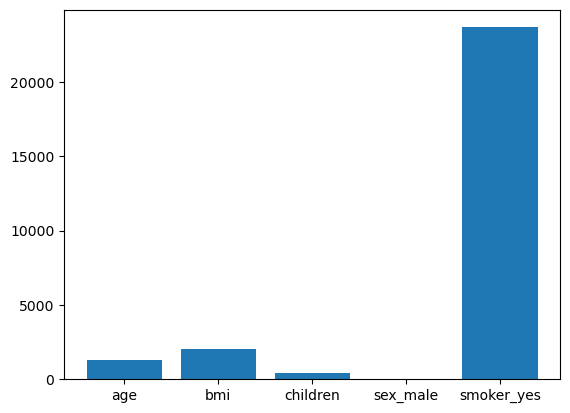

In [54]:
plt.bar(X.columns,lasso_coef)

In [55]:
#sigaranın etkisi çok fazla bu yüzden ridge veya lasso nun punisment etkisi pek bir etki etmiyor

In [56]:
#ridge 

In [57]:
scores2=[]
for i in lasso_alpha:
    ridge=Ridge(alpha=i)
    ridge.fit(X_train,y_train)
    ridge_pred=ridge.predict(X_test)
    scores2.append(ridge.score(X_test,y_test))

In [58]:
print(scores2)

[0.7818497441432246, 0.7818267226844913, 0.7815806975581044, 0.7777143203036749, 0.6874342019416818, 0.30738268890343945]


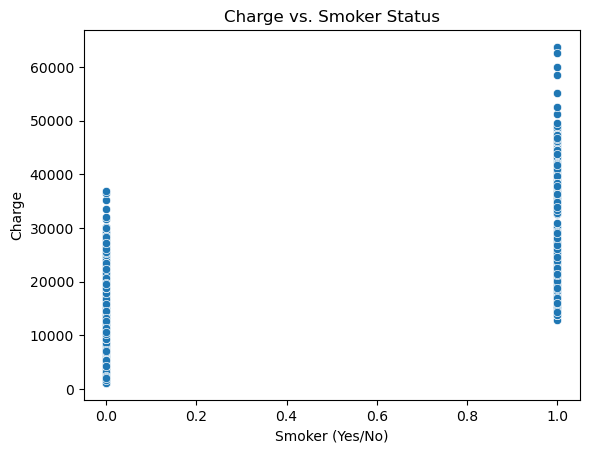

In [61]:
sns.scatterplot(x="smoker_yes", y="charges", data=linear_df)
plt.xlabel("Smoker (Yes/No)")
plt.ylabel("Charge")
plt.title("Charge vs. Smoker Status")
plt.show()

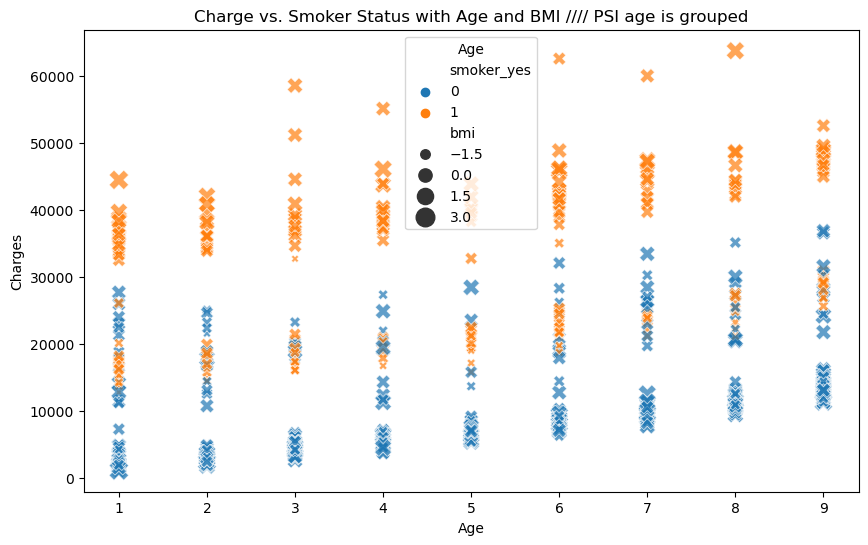

In [71]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="charges", hue="smoker_yes", size="bmi", sizes=(20, 200), data=linear_df,marker="X" ,alpha=0.7)

plt.xlabel("Age")
plt.ylabel("Charges")
plt.title("Charge vs. Smoker Status with Age and BMI //// PSI age is grouped")
plt.legend(title="Age")
plt.show()